<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/Hypothesis_Testing_Two_Sample_t_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This nb demonstrates the use of scipy ttest function.

scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate') **bold text**
Ref. https://www.kite.com/python/docs/scipy.stats.ttest_1samp 

In [3]:
import math
import statistics
import numpy as np
import scipy.stats as stats
import pandas as pd
from statsmodels.stats import weightstats as stests
import matplotlib.pyplot as plt

In [4]:
#the 2nd read option assume that the data file is rignt under your default google drive directory
# the sep-',' argument in the read statement should be used in some cases if ; does not work
data = pd.read_csv('https://raw.githubusercontent.com/changsksu/KState_IMSE541/main/brain_size.csv', sep=';', na_values=".")
data  

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


In [5]:
np.mean(data['VIQ'])

112.35

# One Sample Tests

In [ ]:
# assuming the variance of VIQ is known
ztest ,propability_value = stests.ztest(data['VIQ'], x2=None, value=120)
print(float(propability_value))
if propability_value<0.05:
  print("Null hyphothesis rejected , Alternative hyphothesis accepted")
else:
  print("Null hyphothesis accepted , Alternative hyphothesis rejected")

0.04048926481883569
Null hyphothesis rejected , Alternative hyphothesis accepted


In [ ]:
# one sample t test (default two sided test)
# there are two ways to run this one sample t test
#stats.ttest_1samp(data['VIQ'], 110)
stats.ttest_1samp(a=data['VIQ'], popmean=110)

Ttest_1sampResult(statistic=0.6293461053092635, pvalue=0.5327920500038907)

# Two Sample Tests


In [7]:
#F test for variances of two populations
# the following function is user defined
# define a F test
def f_test(x,y):
  x=np.array(x)
  y=np.array(y)
  f=np.var(x,ddof=1)/np.var(y, ddof=1) # cal F test statistic
  dfn=x.size-1
  dfd=y.size-1
  p=1-stats.f.cdf(f,dfn, dfd) #find p-value of F test statistics
  return f, p
  
male_viq=data[data['Gender']=='Male']['VIQ']
female_viq=data[data['Gender']=='Female']['VIQ']
f_test(male_viq, female_viq)

(1.3999574131873427, 0.23514586725149234)

**Since p value is large (>0.05), we cannot reject H0: variance 1 = variance 2
Which of the following block should you choose?**

In [8]:
#two sample t-test 1: assume the variance is the same (default)
male_viq=data[data['Gender']=='Male']['VIQ']
female_viq=data[data['Gender']=='Female']['VIQ']
stats.ttest_ind(female_viq, male_viq, equal_var=True)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

In [9]:
#two sample t-test method 2: the variances are not the same
stats.ttest_ind(female_viq, male_viq, equal_var=False)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44466074519419097)

In [10]:
#Paired t-Test method 1: using one sample t test
#Test if FISQ and PIQ are signficantly different
#The data for the pair (FISQ, PIQ) are obtained for the same subject 
diff=data['FSIQ']-data['VIQ']
stats.ttest_1samp(diff, 0)


Ttest_1sampResult(statistic=0.8913911665594247, pvalue=0.37818604189634275)

**The above p-value is large, which suggests H0: mu 1 = mu 2 can not be rejected.**

In [11]:
#Paired t-Test method 2: using repeated measures test
#Test if FISQ and PIQ are signficantly different
#The data for the pair (FISQ, PIQ) are obtained for the same subject 

stats.ttest_rel(data['FSIQ'],data['VIQ'])

Ttest_relResult(statistic=0.8913911665594247, pvalue=0.37818604189634275)

# Critcal values of a t distribution

In [12]:
# critcal values of a t distribution
# for two sided 95% CI, the left critical value can be optained
x=data['VIQ']
df1=len(x) -1
stats.t.ppf(q=0.025, df=df1)


-2.0226909117347285

In [13]:
# critcal values of a t distribution
# for two sided 95% CI, the right critical value can be optained

stats.t.ppf(q=0.975, df=df1)


2.022690911734728

In [14]:
# critcal values of a t distribution
# for one sided 95% CI, the right critical value can be optained
# Ha u > u0

stats.t.ppf(q=0.95, df=df1)

1.6848751194973992

# Compute Confidence Intervals
Example 4.9: Two catalysts are analyzed their effect on mean yield of a chemical process


In [15]:
# 95% confidence interval of one sample variance unknown
mean1=np.mean(x)
sigma1=np.std(x)
stats.t.interval(0.95, df=df1, loc=mean1, scale=sigma1)

(65.18279520885642, 159.51720479114357)

Your turn: can you constuct a 99% CI of x?

In [17]:
# 95% confidence interval of Two sample variance is pooled 
# see Montgomery 7ed (4.56)
#x1=data[data['Gender']=='Male']['VIQ']
#x2=data[data['Gender']=='Female']['VIQ']
# Example: Montgomery 7ed Ex 4.9
x1=[91.50, 94.18, 92.18, 95.39, 91.79, 89.07, 94.72, 89.21]
x2=[89.19, 90.95, 90.46, 93.21, 97.19, 97.04, 91.07, 92.75]
n1=len(x1)
n2=len(x2)
mean1=np.mean(x1)
mean2=np.mean(x2)
sigma1=np.std(x1, ddof=1) #ddof=1 so that N-! is used in the diviser
sigma2=np.std(x2, ddof=1)
Sp= math.sqrt(((n1-1)*sigma1**2 + (n2-1)*sigma2**2)/(n1+n2-2))
t0= (mean1-mean2)/(Sp * math.sqrt(1/n1 +1/n2))
LCI= mean1-mean2 - Sp * stats.t.ppf(q=0.925, df=n1+n2-2) * math.sqrt(1/n1 +1/n2)
UCI= mean1-mean2 + Sp * stats.t.ppf(q=0.975, df=n1+n2-2) * math.sqrt(1/n1 +1/n2)
print("Sp=", Sp)
print("(t0, critical value)=(", t0, stats.t.ppf(q=0.975, df=n1+n2-2),")")
print("(LCI, UCI) = (", LCI, UCI, ")")

Sp= 2.7008616350025383
(t0, critical value)=( -0.35359086434617987 2.1447866879169273 )
(LCI, UCI) = ( -2.534334508258147 2.4188860403295034 )


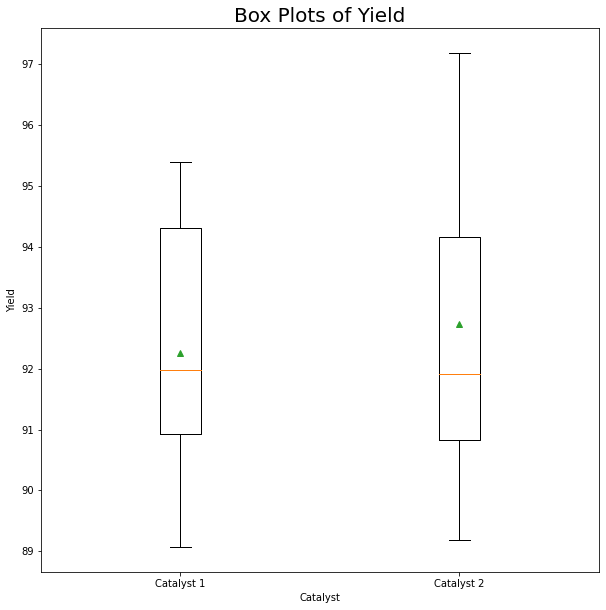

In [24]:
# Box Plots
# Box plots by populations

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plots of Yield", fontsize= 20)
ax.set

data2=[x1, x2]

ax.boxplot(data2,
           labels= ['Catalyst 1', 'Catalyst 2'],
           showmeans= True)

plt.xlabel("Catalyst")
plt.ylabel("Yield")

plt.show()

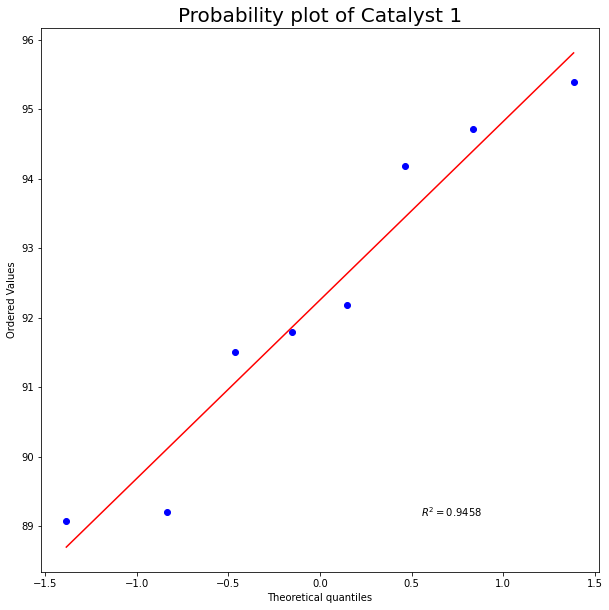

In [22]:
# Probability Plots

# Residual Analysis
# normal check
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(x1, plot= plt, rvalue= True)
ax.set_title("Probability plot of Catalyst 1", fontsize= 20)
ax.set

plt.show()

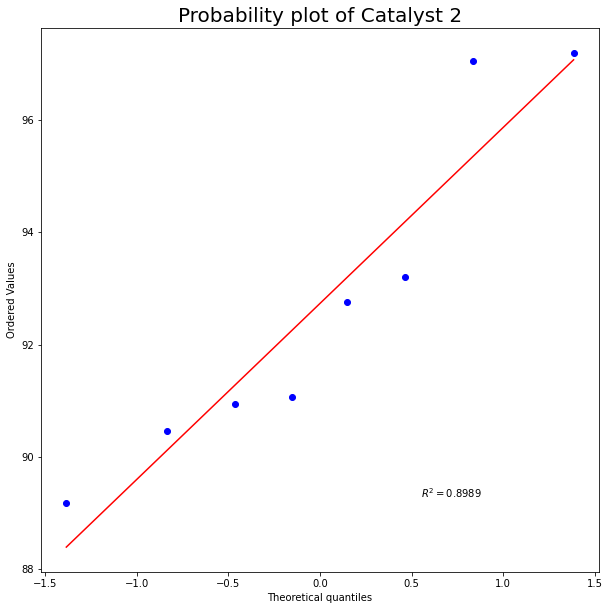

In [23]:
# Probability Plots

# Residual Analysis
# normal check
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(x2, plot= plt, rvalue= True)
ax.set_title("Probability plot of Catalyst 2", fontsize= 20)
ax.set

plt.show()

Your turn: generate the CI for the case where sigma1 <> sigma2